# Employee Data Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

## Reading the data

In [2]:
df = pd.read_csv('C:\\Users\\alfon\\Downloads/Employee.csv')

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.shape

(4653, 9)

## EDA and Feature Engineering

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [6]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [7]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [8]:
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

In [9]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [10]:
y_train = df_train.LeaveOrNot
y_val = df_val.LeaveOrNot
y_test = df_test.LeaveOrNot

del df_train['LeaveOrNot']
del df_val['LeaveOrNot']
del df_test['LeaveOrNot']


In [11]:
categorical = df_train.select_dtypes(include=['object']).columns.tolist()
numerical = df_train.select_dtypes(include=['number']).columns.tolist()

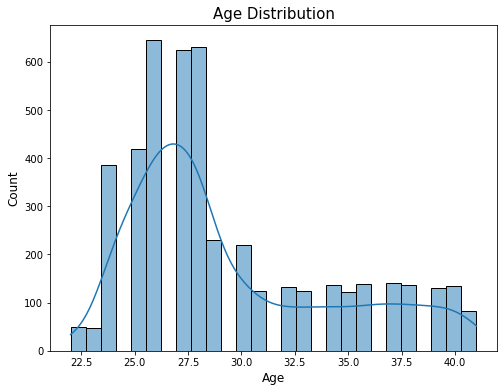

In [12]:
plt.figure(figsize=(8, 6))

sns.histplot(df['Age'], kde=True)

plt.title('Age Distribution',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

<AxesSubplot:ylabel='LeaveOrNot'>

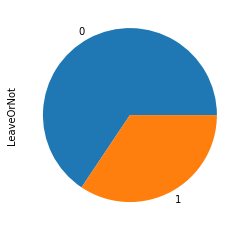

In [13]:
df["LeaveOrNot"].value_counts().plot(kind='pie')

<AxesSubplot:xlabel='Education', ylabel='count'>

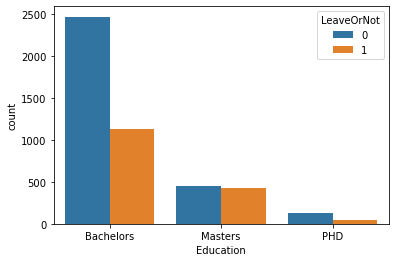

In [14]:
sns.countplot(data=df, x='Education', hue="LeaveOrNot")

<AxesSubplot:xlabel='Gender', ylabel='count'>

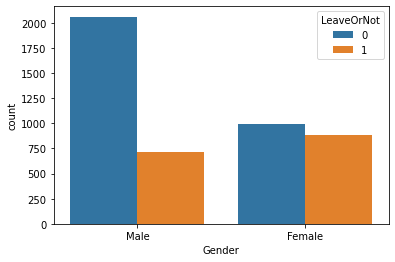

In [15]:
sns.countplot(data=df, x='Gender', hue="LeaveOrNot")

### One hot encoding

In [16]:
from sklearn.feature_extraction import DictVectorizer
train_dict = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=True)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

#### Feature Importance

In [17]:
for x in numerical:
    auc = roc_auc_score(y_train, df_train[x])

    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[x])
    print("\nNumerical variable :", x)
    print("AUC score:", auc)



Numerical variable : JoiningYear
AUC score: 0.6017836579982727

Numerical variable : PaymentTier
AUC score: 0.6077448924104715

Numerical variable : Age
AUC score: 0.5438226269300542

Numerical variable : ExperienceInCurrentDomain
AUC score: 0.5188858577688825


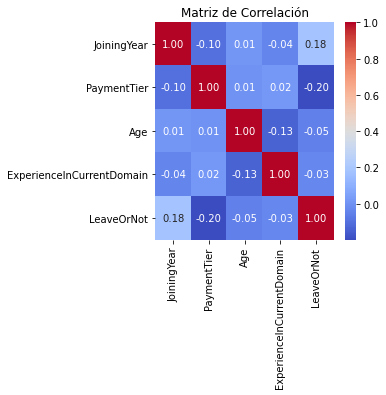

In [18]:
correlation_matrix = df.corr()

# Crea un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [19]:
from sklearn.metrics import mutual_info_score

In [20]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.LeaveOrNot)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

In [21]:
df_mi

,MI
Gender,0.024252
City,0.021090
Education,0.011687
EverBenched,0.002932


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

feature_names = df_train.columns
feature_importances = model.feature_importances_
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance:.4f}")

## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
rmse(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report

In [47]:
import pickle

with open('model.bin', 'wb') as f_out: # 'wb' means write-binary
    pickle.dump((dv, model), f_out)

In [56]:
for n_est in range(10,200,10):
    for depth in [10,15,20,25]:
        rf = RandomForestClassifier(n_estimators=n_est, random_state=1, n_jobs=-1, max_depth= depth)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        score = rmse(y_val,y_pred)
        print(f"n_estimators:{n_est} | max_depth: {depth}  | RMSE: {score:.3f}")

n_estimators:10 | max_depth: 10  | RMSE: 0.381
n_estimators:10 | max_depth: 15  | RMSE: 0.405
n_estimators:10 | max_depth: 20  | RMSE: 0.422
n_estimators:10 | max_depth: 25  | RMSE: 0.426
n_estimators:20 | max_depth: 10  | RMSE: 0.372
n_estimators:20 | max_depth: 15  | RMSE: 0.408
n_estimators:20 | max_depth: 20  | RMSE: 0.420
n_estimators:20 | max_depth: 25  | RMSE: 0.412
n_estimators:30 | max_depth: 10  | RMSE: 0.375
n_estimators:30 | max_depth: 15  | RMSE: 0.401
n_estimators:30 | max_depth: 20  | RMSE: 0.409
n_estimators:30 | max_depth: 25  | RMSE: 0.408
n_estimators:40 | max_depth: 10  | RMSE: 0.375
n_estimators:40 | max_depth: 15  | RMSE: 0.397
n_estimators:40 | max_depth: 20  | RMSE: 0.412
n_estimators:40 | max_depth: 25  | RMSE: 0.408
n_estimators:50 | max_depth: 10  | RMSE: 0.374
n_estimators:50 | max_depth: 15  | RMSE: 0.405
n_estimators:50 | max_depth: 20  | RMSE: 0.408
n_estimators:50 | max_depth: 25  | RMSE: 0.408
n_estimators:60 | max_depth: 10  | RMSE: 0.374
n_estimators: